# Train and Evaluate Models

## Read data

In [704]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

def train_and_test(model, grid, X_train, y_train, X_test, y_test):
    pipe = Pipeline([('scaler', StandardScaler()), ('model', model)])
    pearsonr_scorer = make_scorer(lambda x, y: pearsonr(x, y).statistic, greater_is_better=True)

    grid = GridSearchCV(pipe, grid, cv=10, scoring=pearsonr_scorer, verbose=10, n_jobs=-1)
    grid.fit(X_train, y_train)

    print("Best cross-validation score: {:.2f}".format(grid.best_score_))
    print("Best parameters: {}".format(grid.best_params_))
    print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))

    return grid

# ALL dataset for surprise

In [801]:
df_train = pd.read_csv('features/all_features_train.csv')
df_test = pd.read_csv('features/all_features_test.csv')

idf_cols = [col for col in df_train.columns if 'idf' in col]# + ["wup", "lin", "path", "lch"]

df_train = df_train.drop(columns=idf_cols)
df_test = df_test.drop(columns=idf_cols)

X_train, X_test = df_train.drop(columns=["file"]).copy(), df_test.drop(columns=["file"]).copy()
y_train, y_test = X_train.pop('gs'), X_test.pop('gs')

# X_train = np.log(X_train + 1)
# X_test = np.log(X_test + 1)
# sel_fts = ['dice_n_1_stem', 'path', 'lcseq', 'dice_n_2_spacy', ]
# X_train = X_train[sel_fts]
# X_test = X_test[sel_fts]
# X_train = X_train.drop(columns=["lcstr", "lcseq", "gst"])
# X_test = X_test.drop(columns=["lcstr", "lcseq", "gst"])
# zero_var_cols = [col for col in X_train.columns if X_train[col].var() == 0]
# X_train = X_train.drop(columns=zero_var_cols)
# X_test = X_test.drop(columns=zero_var_cols)



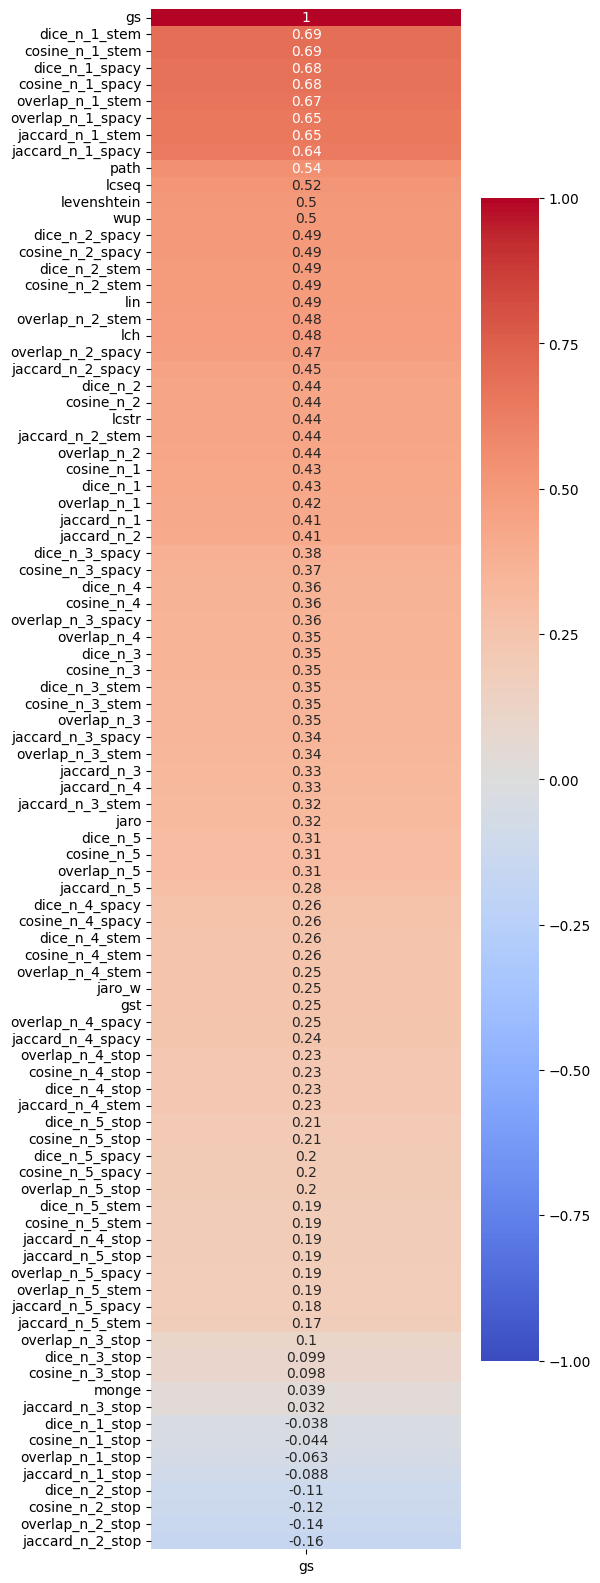

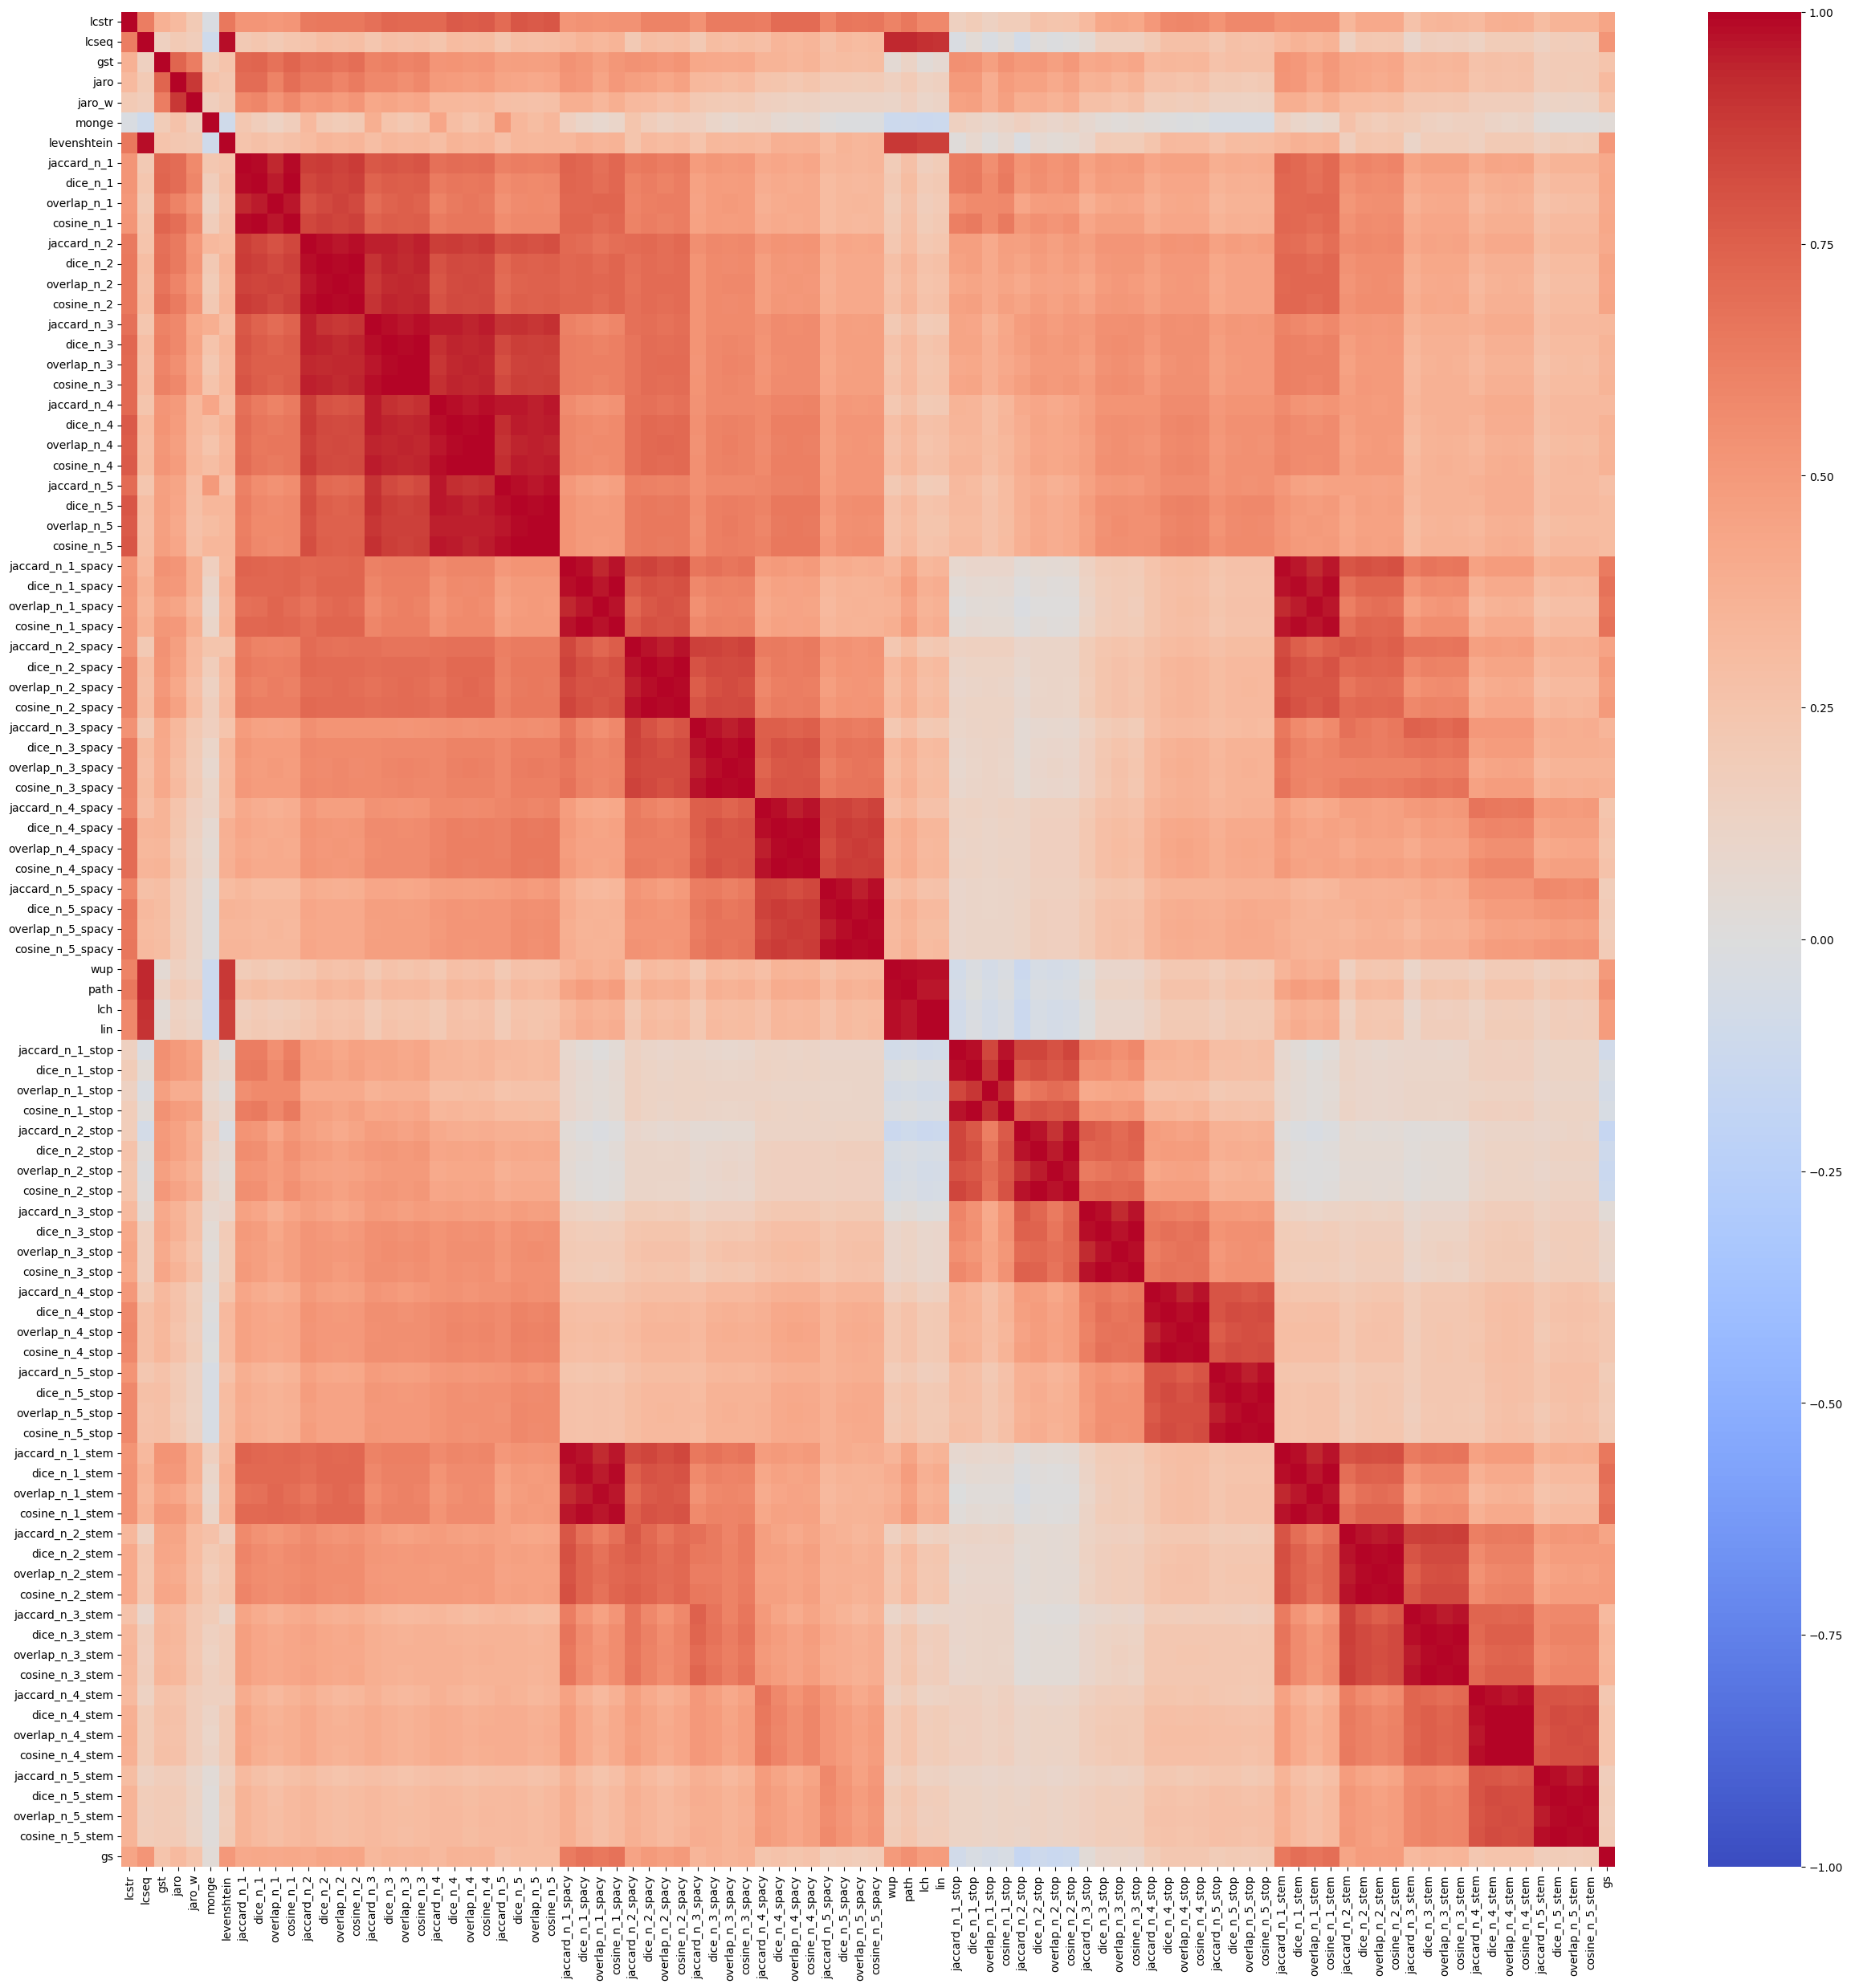

In [799]:
df_corr = df_train.drop(columns="file").copy()
# Plot heatmap of correlations
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_corr = pd.DataFrame(sc.fit_transform(df_corr), columns=df_corr.columns)
plt.figure(figsize=(5, 20))
sns.heatmap(df_corr.corr()[["gs"]].sort_values(by="gs", ascending=False), annot=True, cmap="coolwarm", label="big",
            vmin=-1, vmax=1)
plt.show()

plt.figure(figsize=(30, 30))
sns.heatmap(df_corr.corr(), annot=False, cmap="coolwarm", label="big",
            vmin=-1, vmax=1)
plt.show()

In [724]:
def get_corr(df_train, thresh=0.25, show=True):    
    df_corr = df_train.copy()
    sc = StandardScaler()
    df_corr = pd.DataFrame(sc.fit_transform(df_corr), columns=df_corr.columns)
    if show:
        plt.figure(figsize=(5, 20))
        sns.heatmap(df_corr.corr()[["gs"]].sort_values(by="gs", ascending=False), annot=True, cmap="coolwarm", label="big",
                    vmin=-1, vmax=1)
        plt.show()

    top_corr = df_corr.corr()[["gs"]]
    top_corr = top_corr[top_corr["gs"] > thresh].sort_values(by="gs", ascending=False)
    top_corr = top_corr.drop(index="gs")
    return top_corr.index.tolist()

In [725]:
corre = df_corr.corr()
most_corr = corre[corre["gs"] > 0.25].drop(columns="gs").drop(index="gs")
aux = corre["gs"].drop(index="gs")
dff = pd.DataFrame(most_corr.apply(lambda x: x[x!=1].abs().median(), axis=1), columns=["colin_median"])#.sort_values(ascending=True)
dff["corr_gs"] = aux
ls_corr = (dff["corr_gs"] - dff["colin_median"]).sort_values(ascending=False)
ls_corr = ls_corr[ls_corr > 0].index
ls_corr

Index(['lch_idf', 'lin_idf', 'wup_idf', 'wup', 'lch', 'lin', 'lcseq',
       'path_idf', 'dice_n_1_stem', 'cosine_n_1_stem', 'path',
       'overlap_n_1_stem', 'dice_n_1_spacy', 'cosine_n_1_spacy',
       'overlap_n_1_spacy', 'levenshtein', 'jaccard_n_1_stem',
       'jaccard_n_1_spacy', 'cosine_n_2_stem', 'dice_n_2_stem',
       'overlap_n_2_stem'],
      dtype='object')

In [469]:
df_train.columns

Index(['lcstr', 'lcseq', 'gst', 'jaro', 'jaro_w', 'monge', 'levenshtein',
       'jaccard_n_1', 'dice_n_1', 'overlap_n_1', 'cosine_n_1', 'jaccard_n_2',
       'dice_n_2', 'overlap_n_2', 'cosine_n_2', 'jaccard_n_3', 'dice_n_3',
       'overlap_n_3', 'cosine_n_3', 'jaccard_n_4', 'dice_n_4', 'overlap_n_4',
       'cosine_n_4', 'jaccard_n_5', 'dice_n_5', 'overlap_n_5', 'cosine_n_5',
       'jaccard_n_1_spacy', 'dice_n_1_spacy', 'overlap_n_1_spacy',
       'cosine_n_1_spacy', 'jaccard_n_2_spacy', 'dice_n_2_spacy',
       'overlap_n_2_spacy', 'cosine_n_2_spacy', 'jaccard_n_3_spacy',
       'dice_n_3_spacy', 'overlap_n_3_spacy', 'cosine_n_3_spacy',
       'jaccard_n_4_spacy', 'dice_n_4_spacy', 'overlap_n_4_spacy',
       'cosine_n_4_spacy', 'jaccard_n_5_spacy', 'dice_n_5_spacy',
       'overlap_n_5_spacy', 'cosine_n_5_spacy', 'wup_idf', 'path_idf',
       'lch_idf', 'lin_idf', 'wup', 'path', 'lch', 'lin', 'jaccard_n_1_stop',
       'dice_n_1_stop', 'overlap_n_1_stop', 'cosine_n_1_stop',
     

In [802]:
from sklearn.linear_model import Lasso

model = Lasso(max_iter=100000, tol=0.01, random_state=0)
grid = {'model__alpha': np.linspace(0.00001, 0.01, 100),}

lasso_gscv = train_and_test(model, grid, X_train, y_train, X_test, y_test)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10; 1/100] START model__alpha=1e-05.......................................
[CV 8/10; 1/100] START model__alpha=1e-05.......................................
[CV 2/10; 1/100] START model__alpha=1e-05.......................................
[CV 4/10; 1/100] START model__alpha=1e-05.......................................
[CV 7/10; 1/100] START model__alpha=1e-05.......................................
[CV 2/10; 2/100] START model__alpha=0.00011090909090909092......................
[CV 5/10; 1/100] START model__alpha=1e-05.......................................
[CV 6/10; 2/100] START model__alpha=0.00011090909090909092......................
[CV 6/10; 1/100] START model__alpha=1e-05.......................................
[CV 10/10; 1/100] START model__alpha=1e-05......................................
[CV 9/10; 2/100] START model__alpha=0.00011090909090909092......................
[CV 10/10; 2/100] START model__alpha=0.00011

/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.597e+02, tolerance: 4.489e+01
  model = cd_fast.enet_coordinate_descent(


[CV 1/10; 1/100] END ........model__alpha=1e-05;, score=0.594 total time=  22.0s


/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.867e+02, tolerance: 4.492e+01
  model = cd_fast.enet_coordinate_descent(


[CV 3/10; 1/100] END ........model__alpha=1e-05;, score=0.601 total time=  21.2s


/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.940e+02, tolerance: 4.294e+01
  model = cd_fast.enet_coordinate_descent(
/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.862e+02, tolerance: 4.493e+01
  model = cd_fast.enet_coordinate_descent(


[CV 4/10; 1/100] END ........model__alpha=1e-05;, score=0.685 total time=  21.7s
[CV 2/10; 1/100] END ........model__alpha=1e-05;, score=0.647 total time=  21.8s


/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.401e+02, tolerance: 4.272e+01
  model = cd_fast.enet_coordinate_descent(
/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.386e+02, tolerance: 3.991e+01
  model = cd_fast.enet_coordinate_descent(


[CV 8/10; 1/100] END ........model__alpha=1e-05;, score=0.596 total time=  22.8s
[CV 5/10; 1/100] END ........model__alpha=1e-05;, score=0.740 total time=  22.8s


/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.359e+02, tolerance: 4.312e+01
  model = cd_fast.enet_coordinate_descent(


[CV 9/10; 1/100] END ........model__alpha=1e-05;, score=0.529 total time=  23.1s


/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.125e+02, tolerance: 3.665e+01
  model = cd_fast.enet_coordinate_descent(


[CV 7/10; 1/100] END ........model__alpha=1e-05;, score=0.866 total time=  23.4s


/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.022e+02, tolerance: 3.659e+01
  model = cd_fast.enet_coordinate_descent(


[CV 6/10; 1/100] END ........model__alpha=1e-05;, score=0.741 total time=  24.4s


/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.661e+02, tolerance: 4.271e+01
  model = cd_fast.enet_coordinate_descent(


[CV 10/10; 1/100] END .......model__alpha=1e-05;, score=0.499 total time=  24.7s
Best cross-validation score: 0.65
Best parameters: {'model__alpha': 0.00021181818181818183}
Test set score: 0.69


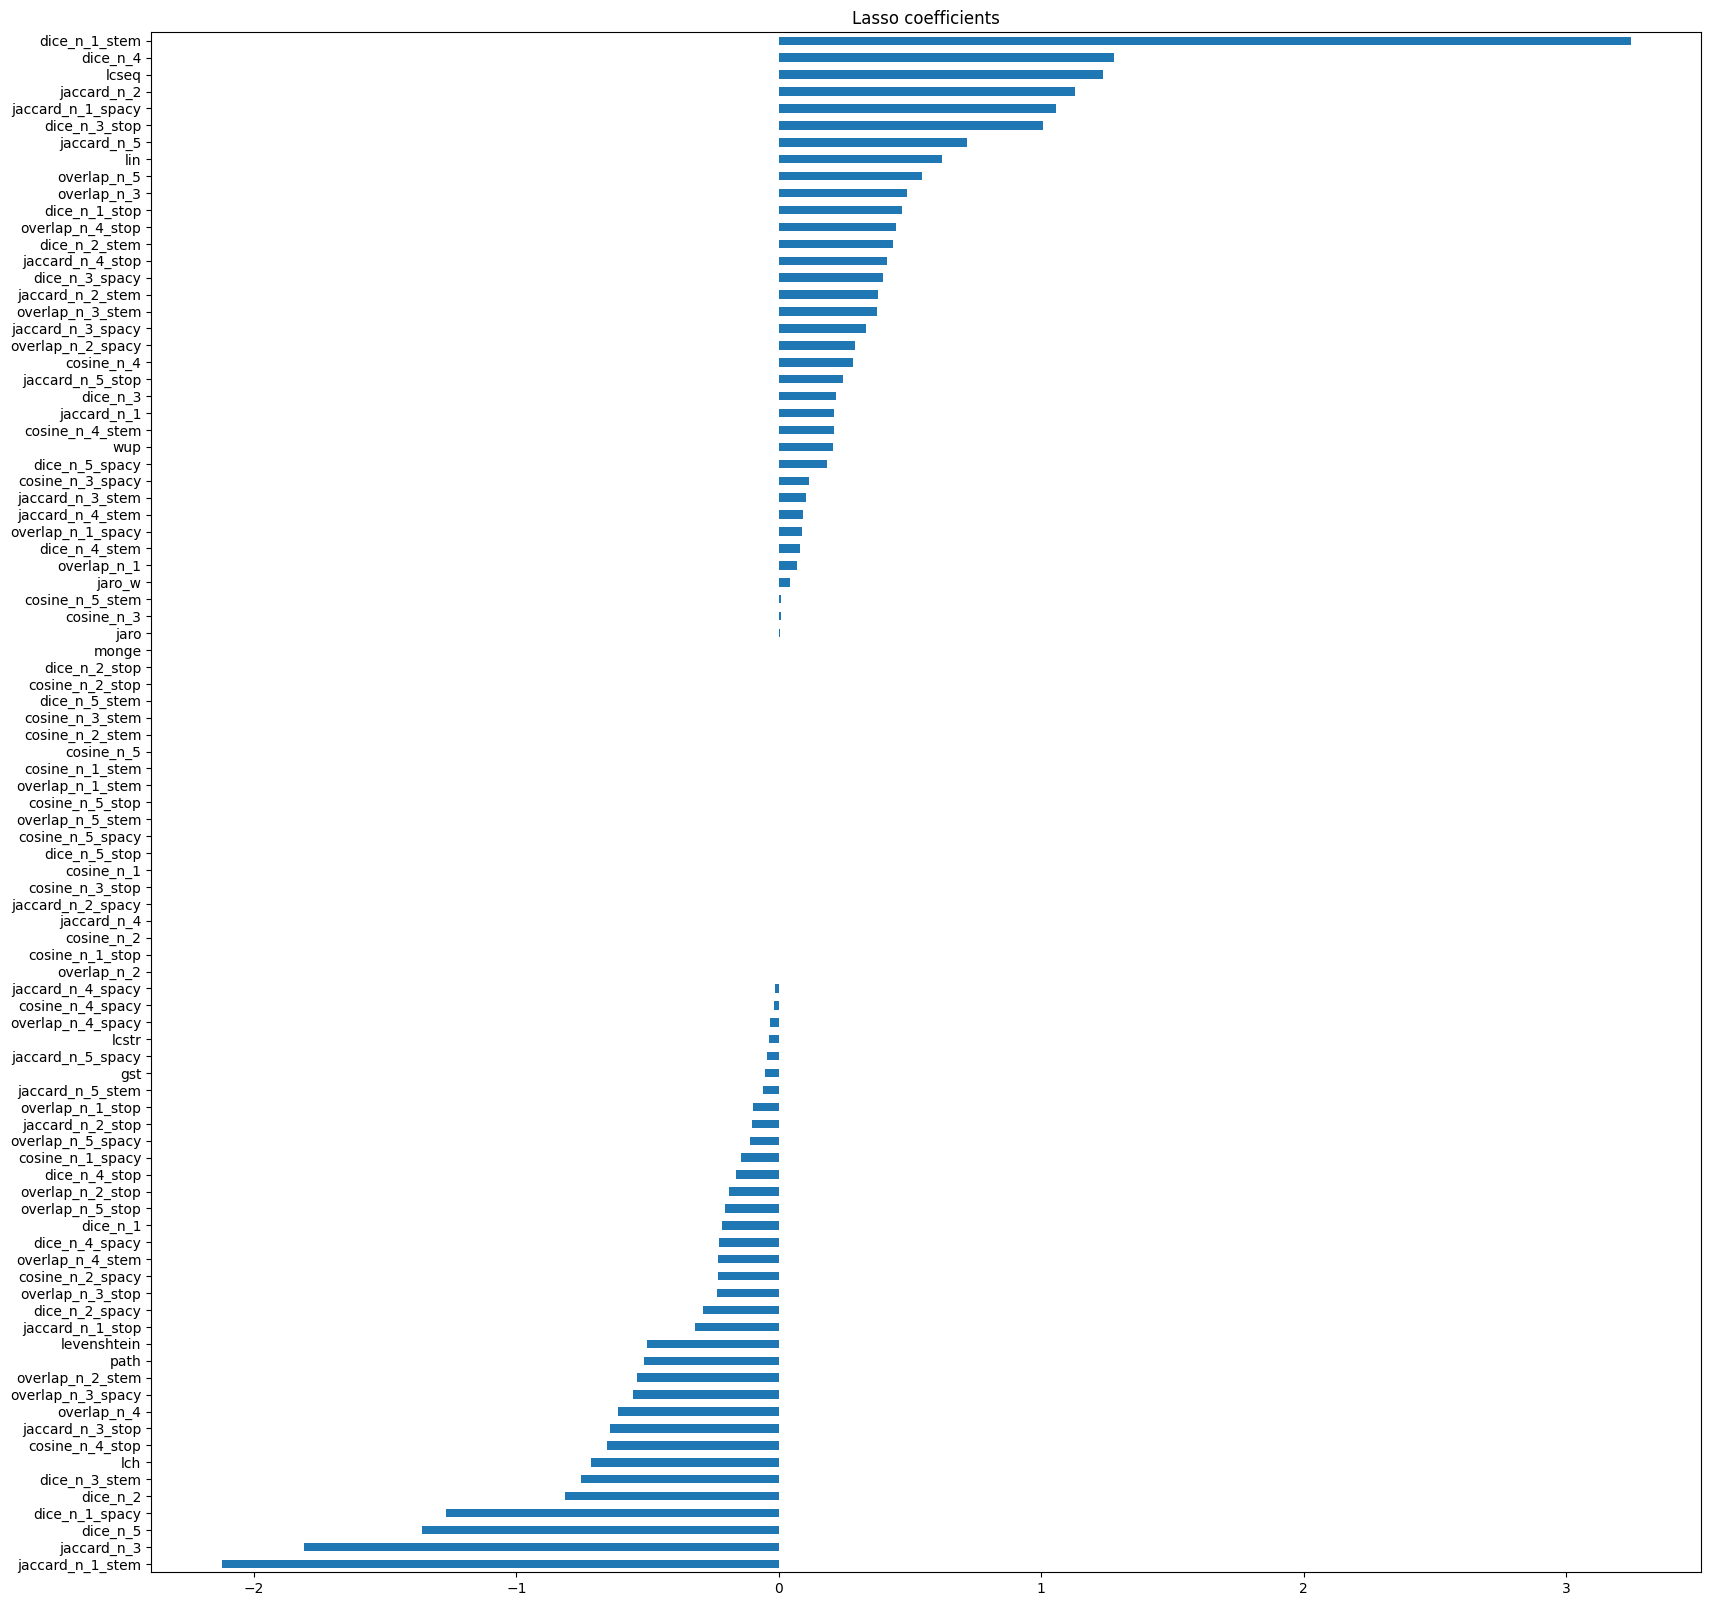

In [803]:
# Create function to plot lasso coefficients
def plot_lasso_coef(model, X_train, figsize=(20, 10)):
    coef = pd.Series(model.best_estimator_.named_steps['model'].coef_, index=X_train.columns)
    coef = coef.sort_values()
    plt.figure(figsize=figsize)
    coef.plot(kind='barh')
    plt.title('Lasso coefficients')
    plt.show()

plot_lasso_coef(lasso_gscv, X_train, (20, 20))

In [805]:
# Get variables with non-zero coefficients
non_zero_coef = lasso_gscv.best_estimator_.named_steps['model'].coef_ != 0
non_zero_coef = X_train.columns[non_zero_coef]
non_zero_coef

Index(['lcstr', 'lcseq', 'gst', 'jaro', 'jaro_w', 'monge', 'levenshtein',
       'jaccard_n_1', 'dice_n_1', 'overlap_n_1', 'jaccard_n_2', 'dice_n_2',
       'jaccard_n_3', 'dice_n_3', 'overlap_n_3', 'cosine_n_3', 'dice_n_4',
       'overlap_n_4', 'cosine_n_4', 'jaccard_n_5', 'dice_n_5', 'overlap_n_5',
       'jaccard_n_1_spacy', 'dice_n_1_spacy', 'overlap_n_1_spacy',
       'cosine_n_1_spacy', 'dice_n_2_spacy', 'overlap_n_2_spacy',
       'cosine_n_2_spacy', 'jaccard_n_3_spacy', 'dice_n_3_spacy',
       'overlap_n_3_spacy', 'cosine_n_3_spacy', 'jaccard_n_4_spacy',
       'dice_n_4_spacy', 'overlap_n_4_spacy', 'cosine_n_4_spacy',
       'jaccard_n_5_spacy', 'dice_n_5_spacy', 'overlap_n_5_spacy', 'wup',
       'path', 'lch', 'lin', 'jaccard_n_1_stop', 'dice_n_1_stop',
       'overlap_n_1_stop', 'jaccard_n_2_stop', 'overlap_n_2_stop',
       'jaccard_n_3_stop', 'dice_n_3_stop', 'overlap_n_3_stop',
       'jaccard_n_4_stop', 'dice_n_4_stop', 'overlap_n_4_stop',
       'cosine_n_4_stop', 'j

In [807]:
# Get variables with non-zero coefficients
pos_coef = lasso_gscv.best_estimator_.named_steps['model'].coef_ > 0
pos_coef = X_train.columns[pos_coef]
pos_coef

Index(['lcseq', 'jaro', 'jaro_w', 'monge', 'jaccard_n_1', 'overlap_n_1',
       'jaccard_n_2', 'dice_n_3', 'overlap_n_3', 'cosine_n_3', 'dice_n_4',
       'cosine_n_4', 'jaccard_n_5', 'overlap_n_5', 'jaccard_n_1_spacy',
       'overlap_n_1_spacy', 'overlap_n_2_spacy', 'jaccard_n_3_spacy',
       'dice_n_3_spacy', 'cosine_n_3_spacy', 'dice_n_5_spacy', 'wup', 'lin',
       'dice_n_1_stop', 'dice_n_3_stop', 'jaccard_n_4_stop',
       'overlap_n_4_stop', 'jaccard_n_5_stop', 'dice_n_1_stem',
       'jaccard_n_2_stem', 'dice_n_2_stem', 'jaccard_n_3_stem',
       'overlap_n_3_stem', 'jaccard_n_4_stem', 'dice_n_4_stem',
       'cosine_n_4_stem', 'cosine_n_5_stem'],
      dtype='object')

In [397]:
# # Random Forest
# from sklearn.svm import SVR
# from xgboost import XGBRegressor
# # forest_param_grid = {'model__C': [0.0001, 0.0001, 0.001, 0.01]}
# xgb = XGBRegressor(random_state=0, n_jobs=-1)
# forest_param_grid = {'model__n_estimators': np.arange(1, 20, 5), 'model__max_depth': np.arange(1, 10, 2),
#                      'model__learning_rate': [0.01, 0.1, 1], 'model__gamma': [1, 10, 100]}
# # cols_stem = [col for col in X_train.columns if "stem" in col and "overlap" not in col]
# # cols_spacy = [col for col in X_train.columns if "spacy" in col and "overlap" not in col]
# # X_train = X_train.drop(columns=cols_stem + cols_spacy)
# # X_test = X_test.drop(columns=cols_stem + cols_spacy)

# svr_gscv = train_and_test(xgb, forest_param_grid, X_train.drop(columns=["path"]), y_train, X_test.drop(columns=["path"]), y_test)

In [398]:
# # plot xgb feature importance
# def plot_xgb_feat_importance(model, X_train, figsize=(20, 10)):
#     coef = pd.Series(model.best_estimator_.named_steps['model'].feature_importances_, index=X_train.columns)
#     coef = coef.sort_values()
#     plt.figure(figsize=figsize)
#     coef.plot(kind='barh')
#     plt.title('XGB feature importance')
#     plt.show()

# plot_xgb_feat_importance(svr_gscv, X_train.drop(columns=["path"]), (20, 20))

In [399]:
df_train.columns

Index(['lcstr', 'lcseq', 'gst', 'jaro', 'jaro_w', 'monge', 'levenshtein',
       'jaccard_n_1', 'dice_n_1', 'overlap_n_1', 'cosine_n_1', 'jaccard_n_2',
       'dice_n_2', 'overlap_n_2', 'cosine_n_2', 'jaccard_n_3', 'dice_n_3',
       'overlap_n_3', 'cosine_n_3', 'jaccard_n_4', 'dice_n_4', 'overlap_n_4',
       'cosine_n_4', 'jaccard_n_5', 'dice_n_5', 'overlap_n_5', 'cosine_n_5',
       'jaccard_n_1_spacy', 'dice_n_1_spacy', 'overlap_n_1_spacy',
       'cosine_n_1_spacy', 'jaccard_n_2_spacy', 'dice_n_2_spacy',
       'overlap_n_2_spacy', 'cosine_n_2_spacy', 'jaccard_n_3_spacy',
       'dice_n_3_spacy', 'overlap_n_3_spacy', 'cosine_n_3_spacy',
       'jaccard_n_4_spacy', 'dice_n_4_spacy', 'overlap_n_4_spacy',
       'cosine_n_4_spacy', 'jaccard_n_5_spacy', 'dice_n_5_spacy',
       'overlap_n_5_spacy', 'cosine_n_5_spacy', 'wup', 'path', 'lch', 'lin',
       'jaccard_n_1_stop', 'dice_n_1_stop', 'overlap_n_1_stop',
       'cosine_n_1_stop', 'jaccard_n_2_stop', 'dice_n_2_stop',
       'overl

In [808]:
# Random Forest
rf = RandomForestRegressor(random_state=42)
forest_param_grid = {'model__n_estimators': np.arange(100, 500, 50), 
                     'model__min_samples_leaf': [2, 4, 6, 8, 10],
                    'model__n_jobs': [-1]}
# cols_stem = [col for col in X_train.columns if "stem" in col and "overlap" not in col]
# cols_spacy = [col for col in X_train.columns if "spacy" in col and "overlap" not in col]
# X_train = X_train.drop(columns=cols_stem + cols_spacy)
# X_test = X_test.drop(columns=cols_stem + cols_spacy)

X_train = X_train[pos_coef]
X_test = X_test[pos_coef]
rf_gscv = train_and_test(rf, forest_param_grid, X_train, y_train, X_test, y_test)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV 2/10; 1/40] START model__min_samples_leaf=2, model__n_estimators=100, model__n_jobs=-1
[CV 4/10; 1/40] START model__min_samples_leaf=2, model__n_estimators=100, model__n_jobs=-1
[CV 1/10; 1/40] START model__min_samples_leaf=2, model__n_estimators=100, model__n_jobs=-1
[CV 10/10; 1/40] START model__min_samples_leaf=2, model__n_estimators=100, model__n_jobs=-1
[CV 3/10; 1/40] START model__min_samples_leaf=2, model__n_estimators=100, model__n_jobs=-1
[CV 5/10; 1/40] START model__min_samples_leaf=2, model__n_estimators=100, model__n_jobs=-1
[CV 2/10; 2/40] START model__min_samples_leaf=2, model__n_estimators=150, model__n_jobs=-1
[CV 6/10; 1/40] START model__min_samples_leaf=2, model__n_estimators=100, model__n_jobs=-1
[CV 7/10; 1/40] START model__min_samples_leaf=2, model__n_estimators=100, model__n_jobs=-1
[CV 3/10; 2/40] START model__min_samples_leaf=2, model__n_estimators=150, model__n_jobs=-1
[CV 8/10; 1/40] START mode

In [809]:
df_res = pd.DataFrame(rf_gscv.cv_results_)
df_res.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__min_samples_leaf,param_model__n_estimators,param_model__n_jobs,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
12,10.325920,0.724001,0.326541,0.237349,4,300,-1,"{'model__min_samples_leaf': 4, 'model__n_estim...",0.623063,0.579563,0.563804,0.726905,0.805479,0.812458,0.897085,0.694547,0.681989,0.660017,0.704491,0.102012,1
15,14.601170,1.356800,0.506541,0.313202,4,450,-1,"{'model__min_samples_leaf': 4, 'model__n_estim...",0.621678,0.575304,0.565648,0.727683,0.804383,0.813485,0.896798,0.696013,0.682427,0.658881,0.704230,0.102392,2
14,13.670907,0.897206,0.474220,0.246607,4,400,-1,"{'model__min_samples_leaf': 4, 'model__n_estim...",0.620783,0.576053,0.566233,0.727366,0.804031,0.813181,0.896841,0.695867,0.682570,0.658171,0.704110,0.102255,3
13,11.854480,0.954152,0.608070,0.263030,4,350,-1,"{'model__min_samples_leaf': 4, 'model__n_estim...",0.620705,0.577589,0.563045,0.727668,0.804596,0.812699,0.896635,0.695580,0.682944,0.659296,0.704076,0.102422,4
10,7.028486,0.709583,0.434329,0.251620,4,200,-1,"{'model__min_samples_leaf': 4, 'model__n_estim...",0.621766,0.580268,0.562432,0.725757,0.805100,0.814126,0.896603,0.694958,0.678653,0.660134,0.703980,0.102313,5


In [810]:
y_pred = rf_gscv.predict(X_test)
print("Pearson correlation between predicted and true values: {:.4f}".format(pearsonr(y_pred, y_test)[0]))
y_pred_onwn = rf_gscv.predict(X_test[df_test['file'] == "surprise.OnWN"])
y_onwn = y_test[df_test['file'] == "surprise.OnWN"]

print("OnWN: Pearson correlation between predicted and true values: {:.4f}".format(pearsonr(y_pred_onwn, y_onwn)[0]))

Pearson correlation between predicted and true values: 0.7297
OnWN: Pearson correlation between predicted and true values: 0.6943


In [811]:
y_pred = rf_gscv.predict(X_test)
y_pred_smt = rf_gscv.predict(X_test[df_test['file'] == "surprise.SMTnews"])
y_smt = y_test[df_test['file'] == "surprise.SMTnews"]

print("SMTnews: Pearson correlation between predicted and true values: {:.4f}".format(pearsonr(y_pred_smt, y_smt)[0]))

SMTnews: Pearson correlation between predicted and true values: 0.5065


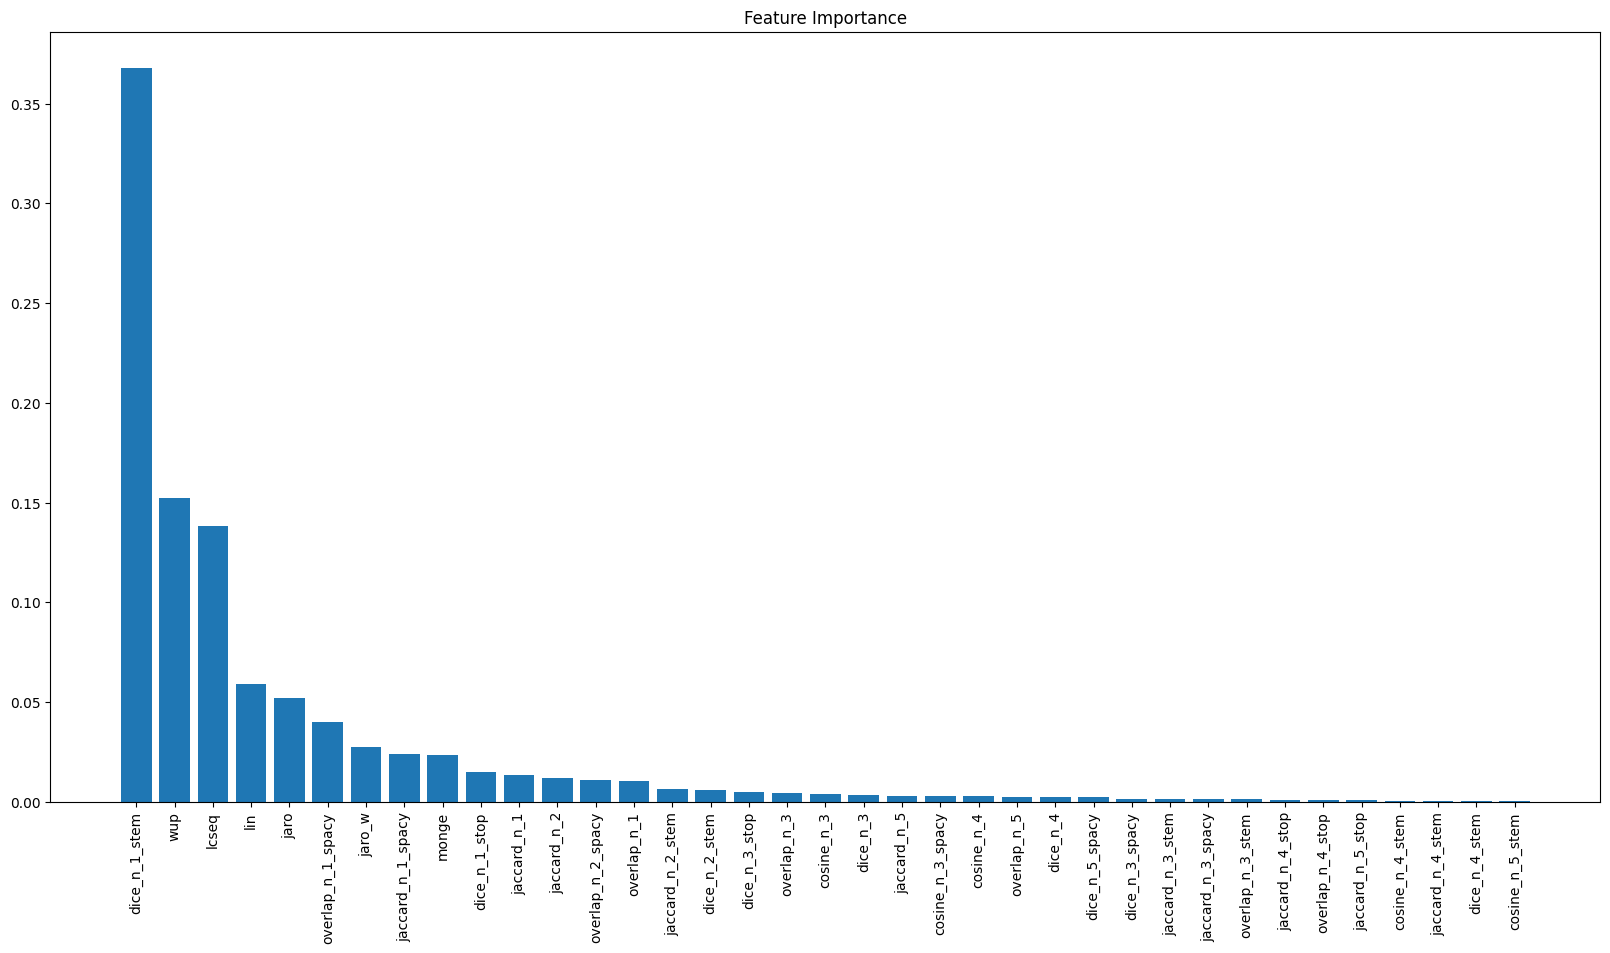

In [812]:
def plot_feature_importances(rf, df):
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    names = [df.columns[i] for i in indices]
    plt.figure(figsize=(20, 10))
    plt.title("Feature Importance")
    plt.bar(range(df.shape[1]), importances[indices])
    plt.xticks(range(df.shape[1]), names, rotation=90)
    plt.show()

plot_feature_importances(rf_gscv.best_estimator_['model'], X_train)

# MSRpar

In [815]:
df_train_par = pd.read_csv('features/MSRpar_features_train.csv')
df_test_par = pd.read_csv('features/MSRpar_features_test.csv')

idf_cols = [col for col in df_train_par.columns if 'idf' in col]

df_train_par = df_train_par.drop(columns=idf_cols)
df_test_par = df_test_par.drop(columns=idf_cols)

X_train_par, X_test_par = df_train_par.drop(columns=["file"]).copy(), df_test_par.drop(columns=["file"]).copy()
y_train_par, y_test_par = X_train_par.pop('gs'), X_test_par.pop('gs')

model = Lasso(max_iter=100000, tol=0.01, random_state=0)
grid = {'model__alpha': np.linspace(0.00001, 0.01, 100),}

lasso_gscv_par = train_and_test(model, grid, X_train_par, y_train_par, X_test_par, y_test_par)

# Get variables with non-zero coefficients
pos_coef_par = lasso_gscv_par.best_estimator_.named_steps['model'].coef_ > 0
pos_coef_par = X_train_par.columns[pos_coef_par]

X_train_par = X_train_par[pos_coef_par]
X_test_par = X_test_par[pos_coef_par]

# Random Forest
rf = RandomForestRegressor(random_state=42)
forest_param_grid_par = {'model__n_estimators': np.arange(100, 300, 50), 
                         'model__min_samples_leaf': np.arange(2, 12, 2),
                         'model__n_jobs': [-1]}
rf_gscv_par = train_and_test(rf, forest_param_grid_par, X_train_par, y_train_par, X_test_par, y_test_par)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10; 1/100] START model__alpha=1e-05.......................................
[CV 2/10; 1/100] START model__alpha=1e-05.......................................
[CV 3/10; 1/100] START model__alpha=1e-05.......................................
[CV 4/10; 1/100] START model__alpha=1e-05.......................................
[CV 5/10; 1/100] START model__alpha=1e-05.......................................
[CV 6/10; 1/100] START model__alpha=1e-05.......................................
[CV 7/10; 1/100] START model__alpha=1e-05.......................................
[CV 8/10; 1/100] START model__alpha=1e-05.......................................
[CV 9/10; 1/100] START model__alpha=1e-05.......................................
[CV 10/10; 1/100] START model__alpha=1e-05......................................
[CV 1/10; 2/100] START model__alpha=0.00011090909090909092......................
[CV 2/10; 2/100] START model__alpha=0.000110

/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.974e+01, tolerance: 5.690e+00
  model = cd_fast.enet_coordinate_descent(
/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.681e+01, tolerance: 5.780e+00
  model = cd_fast.enet_coordinate_descent(
/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not conv

[CV 10/10; 1/100] END .......model__alpha=1e-05;, score=0.710 total time=   7.5s
[CV 1/10; 1/100] END ........model__alpha=1e-05;, score=0.683 total time=   7.6s
[CV 8/10; 1/100] END ........model__alpha=1e-05;, score=0.708 total time=   7.6s
[CV 6/10; 1/100] END ........model__alpha=1e-05;, score=0.722 total time=   7.6s


/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.810e+01, tolerance: 5.832e+00
  model = cd_fast.enet_coordinate_descent(
/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.770e+01, tolerance: 5.888e+00
  model = cd_fast.enet_coordinate_descent(
/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not conv

[CV 3/10; 1/100] END ........model__alpha=1e-05;, score=0.695 total time=   7.8s
[CV 5/10; 1/100] END ........model__alpha=1e-05;, score=0.515 total time=   7.8s
[CV 7/10; 1/100] END ........model__alpha=1e-05;, score=0.591 total time=   7.9s
[CV 4/10; 1/100] END ........model__alpha=1e-05;, score=0.662 total time=   8.0s


/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.196e+01, tolerance: 5.915e+00
  model = cd_fast.enet_coordinate_descent(
/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.882e+01, tolerance: 5.770e+00
  model = cd_fast.enet_coordinate_descent(


[CV 2/10; 1/100] END ........model__alpha=1e-05;, score=0.575 total time=   8.5s
[CV 9/10; 1/100] END ........model__alpha=1e-05;, score=0.744 total time=   8.5s
Best cross-validation score: 0.68
Best parameters: {'model__alpha': 0.0019272727272727273}
Test set score: 0.67
Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV 1/10; 1/20] START model__min_samples_leaf=2, model__n_estimators=100, model__n_jobs=-1
[CV 2/10; 1/20] START model__min_samples_leaf=2, model__n_estimators=100, model__n_jobs=-1
[CV 3/10; 1/20] START model__min_samples_leaf=2, model__n_estimators=100, model__n_jobs=-1
[CV 4/10; 1/20] START model__min_samples_leaf=2, model__n_estimators=100, model__n_jobs=-1
[CV 5/10; 1/20] START model__min_samples_leaf=2, model__n_estimators=100, model__n_jobs=-1
[CV 6/10; 1/20] START model__min_samples_leaf=2, model__n_estimators=100, model__n_jobs=-1
[CV 7/10; 1/20] START model__min_samples_leaf=2, model__n_estimators=100, model__n_jobs=-1
[CV 8/10; 1/20] START mode

In [816]:
pd.DataFrame(rf_gscv_par.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__min_samples_leaf,param_model__n_estimators,param_model__n_jobs,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
11,2.579720,0.117162,0.129395,0.026812,6,250,-1,"{'model__min_samples_leaf': 6, 'model__n_estim...",0.663911,0.584234,0.651005,0.624235,0.591169,0.659306,0.615383,0.726637,0.727952,0.702403,0.654624,0.049408,1
14,2.092984,0.125774,0.105455,0.032023,8,200,-1,"{'model__min_samples_leaf': 8, 'model__n_estim...",0.665000,0.594174,0.649212,0.619260,0.595457,0.655864,0.613360,0.727486,0.722035,0.702304,0.654415,0.047300,2
10,2.080472,0.090874,0.116659,0.035048,6,200,-1,"{'model__min_samples_leaf': 6, 'model__n_estim...",0.665542,0.588459,0.649901,0.623364,0.592568,0.657496,0.613555,0.724277,0.726028,0.701424,0.654261,0.048147,3
15,2.526414,0.065740,0.127936,0.023358,8,250,-1,"{'model__min_samples_leaf': 8, 'model__n_estim...",0.664741,0.586357,0.650292,0.620416,0.593411,0.656438,0.613662,0.731919,0.722505,0.702136,0.654188,0.049211,4
7,2.862897,0.101928,0.119943,0.028897,4,250,-1,"{'model__min_samples_leaf': 4, 'model__n_estim...",0.663244,0.576495,0.644068,0.624698,0.594504,0.657213,0.623395,0.714061,0.725770,0.704166,0.652761,0.047745,5


In [819]:
y_pred_par = rf_gscv_par.predict(X_test_par)

print("MSRpar: Pearson correlation between predicted and true values: {:.2f}".format(pearsonr(y_pred_par, y_test_par)[0]))

MSRpar: Pearson correlation between predicted and true values: 0.66


In [820]:
print("Using ALL instead of specific")
# y_pred = rf_gscv.predict(X_test)
y_pred_par_all = rf_gscv.predict(X_test[df_test['file'] == "MSRpar"])
y_par_all = y_test[df_test['file'] == "MSRpar"]

print("MSRpar: Pearson correlation between predicted and true values: {:.2f}".format(pearsonr(y_pred_par_all, y_par_all)[0]))

Using ALL instead of specific
MSRpar: Pearson correlation between predicted and true values: 0.63


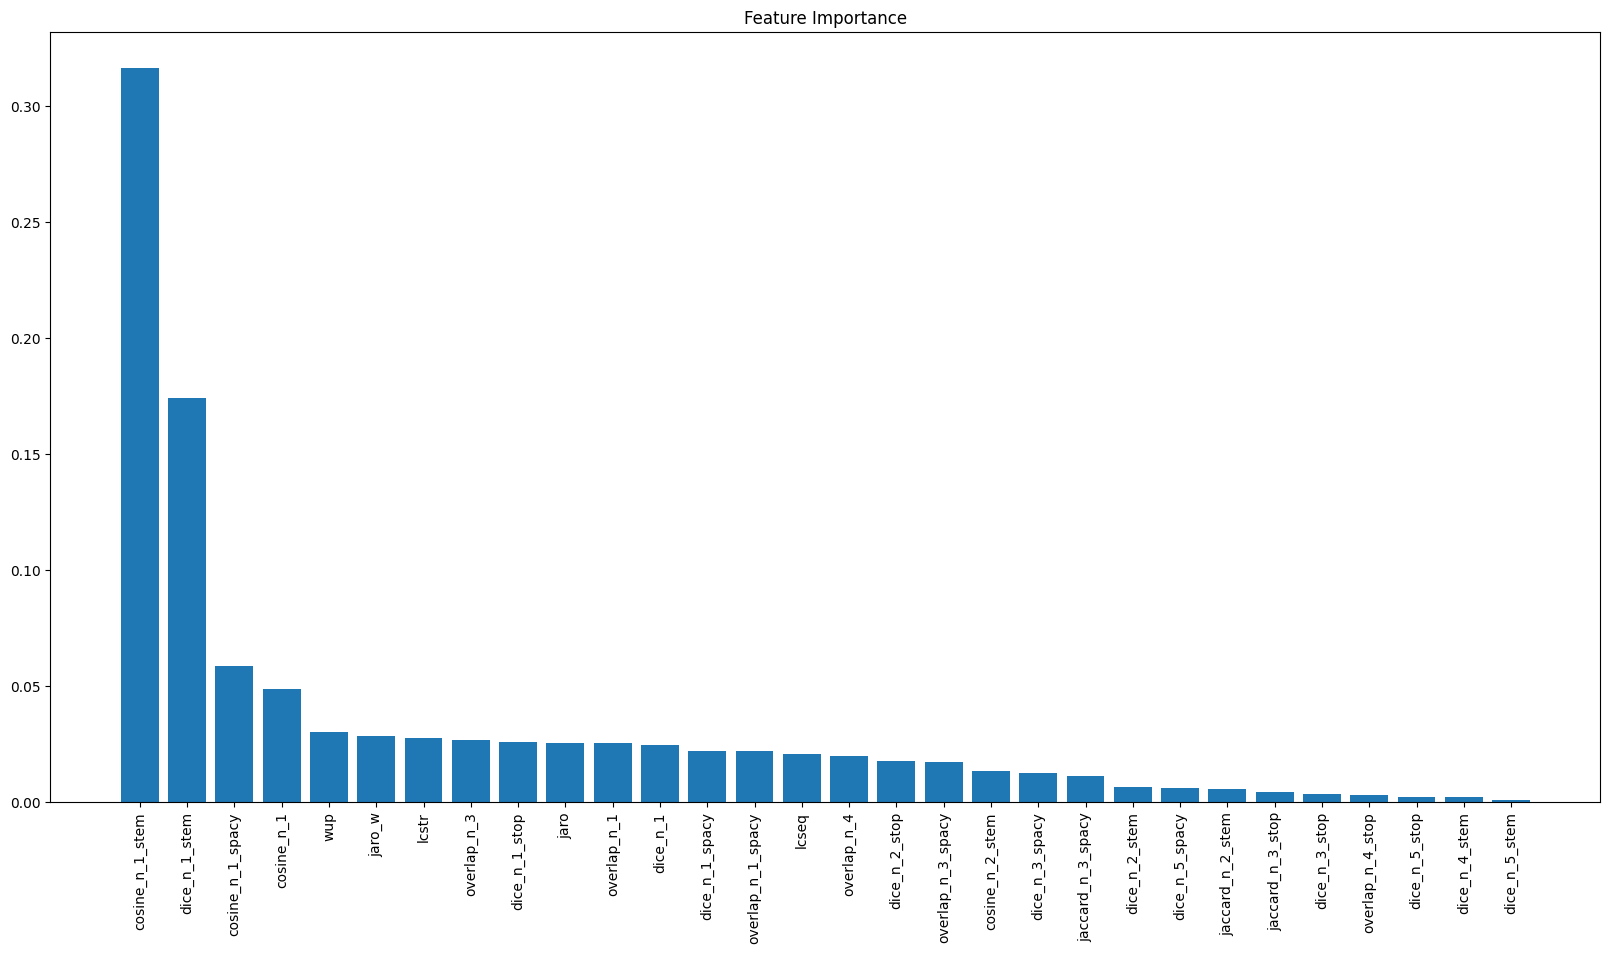

In [821]:
plot_feature_importances(rf_gscv_par.best_estimator_['model'], X_train_par)

## MSRvid

In [822]:
df_train_vid = pd.read_csv('features/MSRvid_features_train.csv')
df_test_vid = pd.read_csv('features/MSRvid_features_test.csv')

# idf_cols = [col for col in df_train_vid.columns if 'idf' in col]
df_train_vid = df_train_vid.drop(columns=idf_cols)
df_test_vid = df_test_vid.drop(columns=idf_cols)

X_train_vid, X_test_vid = df_train_vid.drop(columns=["file"]).copy(), df_test_vid.drop(columns=["file"]).copy()
y_train_vid, y_test_vid = X_train_vid.pop('gs'), X_test_vid.pop('gs')

model = Lasso(max_iter=100000, tol=0.01, random_state=0)
grid = {'model__alpha': np.linspace(0.00001, 0.01, 100),}

lasso_gscv_vid = train_and_test(model, grid, X_train_vid, y_train_vid, X_test_vid, y_test_vid)

# Get variables with non-zero coefficients
pos_coef_vid = lasso_gscv_vid.best_estimator_.named_steps['model'].coef_ > 0
pos_coef_vid = X_train_vid.columns[pos_coef_vid]

X_train_vid = X_train_vid[pos_coef_vid]
X_test_vid = X_test_vid[pos_coef_vid]

# Random Forest
rf = RandomForestRegressor(random_state=42)
forest_param_grid_vid = {'model__n_estimators': np.arange(100, 500, 50), 
                     'model__min_samples_leaf': [2, 4, 6, 8, 10],
                    'model__n_jobs': [-1]}

rf_gscv_vid = train_and_test(rf, forest_param_grid_vid, X_train_vid, 
                             y_train_vid, X_test_vid, y_test_vid)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10; 1/100] START model__alpha=1e-05.......................................
[CV 2/10; 1/100] START model__alpha=1e-05.......................................
[CV 3/10; 1/100] START model__alpha=1e-05.......................................
[CV 4/10; 1/100] START model__alpha=1e-05.......................................
[CV 5/10; 1/100] START model__alpha=1e-05.......................................
[CV 6/10; 1/100] START model__alpha=1e-05.......................................
[CV 7/10; 1/100] START model__alpha=1e-05.......................................
[CV 8/10; 1/100] START model__alpha=1e-05.......................................
[CV 9/10; 1/100] START model__alpha=1e-05.......................................
[CV 10/10; 1/100] START model__alpha=1e-05......................................
[CV 1/10; 2/100] START model__alpha=0.00011090909090909092......................
[CV 2/10; 2/100] START model__alpha=0.000110

/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.227e+02, tolerance: 1.587e+01
  model = cd_fast.enet_coordinate_descent(
/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.473e+02, tolerance: 1.697e+01
  model = cd_fast.enet_coordinate_descent(
/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not conv

[CV 1/10; 1/100] END ........model__alpha=1e-05;, score=0.067 total time=   7.2s
[CV 10/10; 1/100] END .......model__alpha=1e-05;, score=0.764 total time=   7.2s
[CV 2/10; 1/100] END ........model__alpha=1e-05;, score=0.790 total time=   7.3s
[CV 4/10; 1/100] END ........model__alpha=1e-05;, score=0.756 total time=   7.4s


/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.558e+02, tolerance: 1.738e+01
  model = cd_fast.enet_coordinate_descent(
/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.696e+02, tolerance: 1.752e+01
  model = cd_fast.enet_coordinate_descent(
/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not conv

[CV 5/10; 1/100] END ........model__alpha=1e-05;, score=0.783 total time=   7.4s
[CV 6/10; 1/100] END ........model__alpha=1e-05;, score=0.806 total time=   7.4s
[CV 7/10; 1/100] END ........model__alpha=1e-05;, score=0.708 total time=   7.5s


/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.604e+02, tolerance: 1.699e+01
  model = cd_fast.enet_coordinate_descent(
/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.720e+02, tolerance: 1.721e+01
  model = cd_fast.enet_coordinate_descent(


[CV 9/10; 1/100] END ........model__alpha=1e-05;, score=0.836 total time=   7.7s
[CV 3/10; 1/100] END ........model__alpha=1e-05;, score=0.727 total time=   7.8s


/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.524e+02, tolerance: 1.718e+01
  model = cd_fast.enet_coordinate_descent(


[CV 8/10; 1/100] END ........model__alpha=1e-05;, score=0.777 total time=   8.1s
Best cross-validation score: 0.73
Best parameters: {'model__alpha': 0.0009181818181818183}
Test set score: 0.83
Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV 1/10; 1/40] START model__min_samples_leaf=2, model__n_estimators=100, model__n_jobs=-1
[CV 2/10; 1/40] START model__min_samples_leaf=2, model__n_estimators=100, model__n_jobs=-1
[CV 3/10; 1/40] START model__min_samples_leaf=2, model__n_estimators=100, model__n_jobs=-1
[CV 4/10; 1/40] START model__min_samples_leaf=2, model__n_estimators=100, model__n_jobs=-1
[CV 5/10; 1/40] START model__min_samples_leaf=2, model__n_estimators=100, model__n_jobs=-1
[CV 6/10; 1/40] START model__min_samples_leaf=2, model__n_estimators=100, model__n_jobs=-1
[CV 7/10; 1/40] START model__min_samples_leaf=2, model__n_estimators=100, model__n_jobs=-1
[CV 8/10; 1/40] START model__min_samples_leaf=2, model__n_estimators=100, model__n_jobs=-1
[CV 9/10; 1/40] 

In [823]:
y_pred_vid = rf_gscv_vid.predict(X_test_vid)

print("MSRvid: Pearson correlation between predicted and true values: {:.2f}".format(pearsonr(y_pred_vid, y_test_vid)[0]))

MSRvid: Pearson correlation between predicted and true values: 0.84


In [824]:
print("Using ALL instead of specific")
# y_pred = rf_gscv.predict(X_test)
y_pred_vid_all = rf_gscv.predict(X_test[df_test['file'] == "MSRvid"])
y_vid_all = y_test[df_test['file'] == "MSRvid"]

print("MSRvid: Pearson correlation between predicted and true values: {:.2f}".format(pearsonr(y_pred_vid_all, y_vid_all)[0]))

Using ALL instead of specific
MSRvid: Pearson correlation between predicted and true values: 0.84


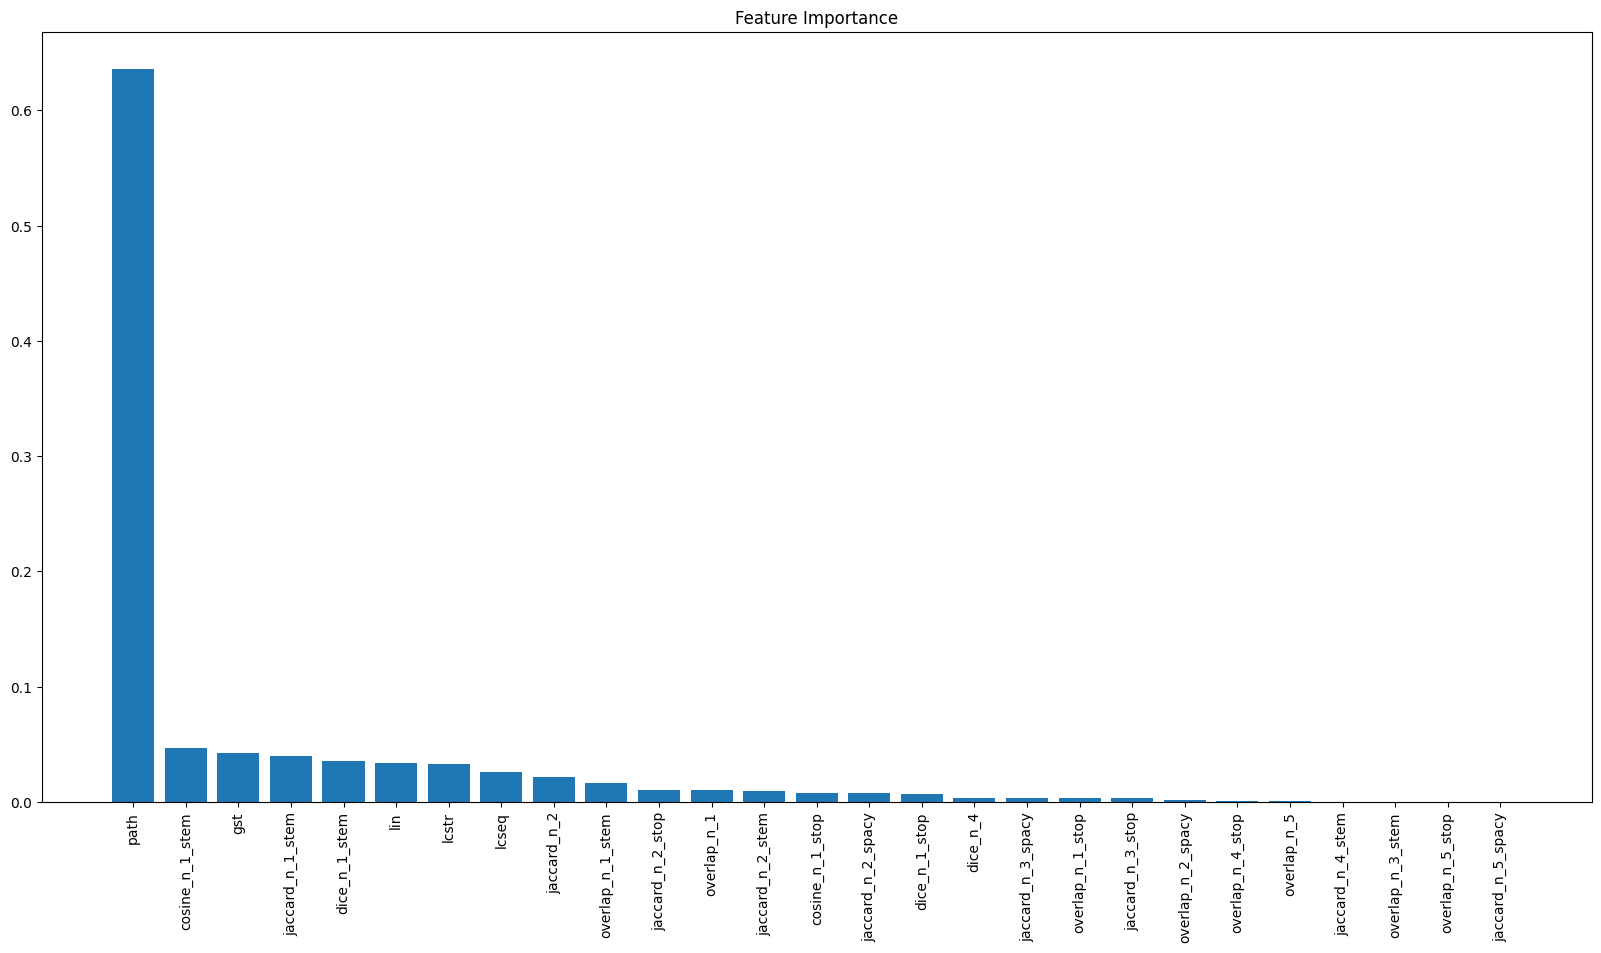

In [825]:
plot_feature_importances(rf_gscv_vid.best_estimator_['model'], X_train_vid)

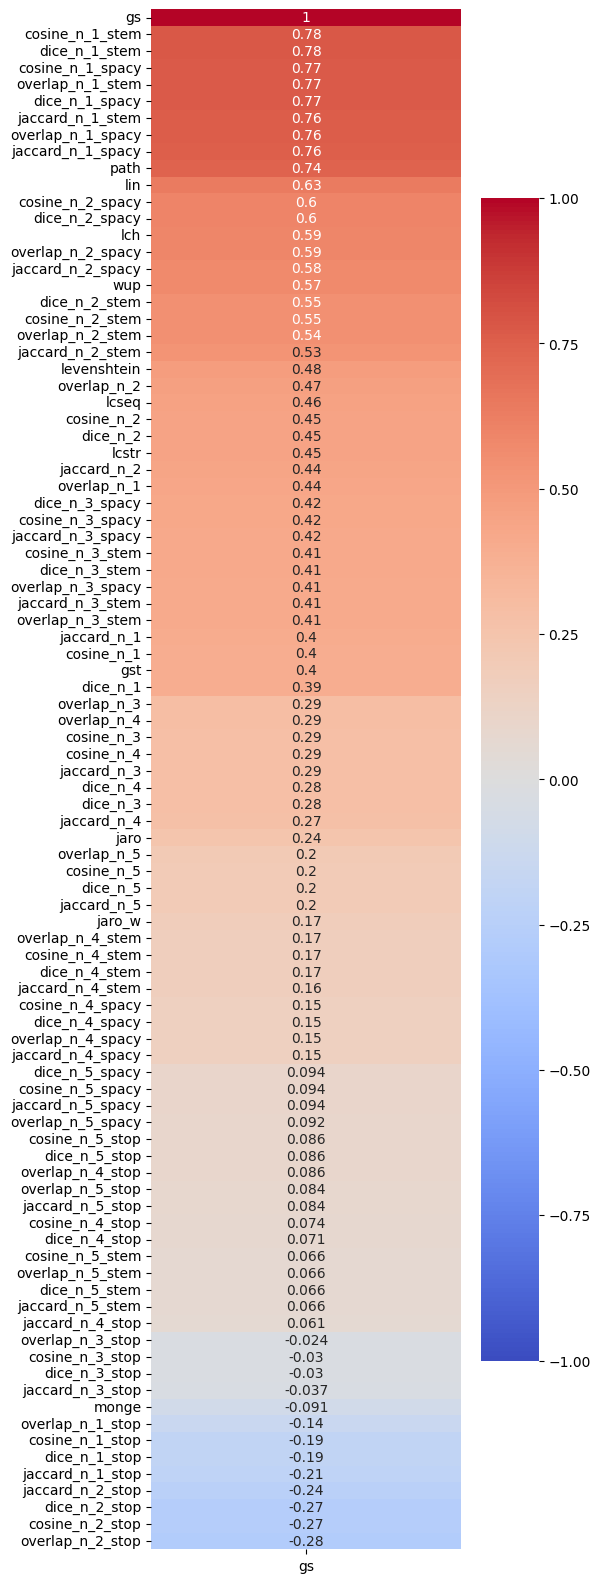

In [770]:
X_corr_vid = X_train_vid.copy()
X_corr_vid["gs"] = y_train_vid
best_corr_vid = get_corr(X_corr_vid, thresh=0.38)

## Europarl

In [826]:
df_train_eur = pd.read_csv('features/SMTeuroparl_features_train.csv')
df_test_eur = pd.read_csv('features/SMTeuroparl_features_test.csv')

# idf_cols = [col for col in df_train_eur.columns if 'idf' in col]

df_train_eur = df_train_eur.drop(columns=idf_cols)
df_test_eur = df_test_eur.drop(columns=idf_cols)

X_train_eur, X_test_eur = df_train_eur.drop(columns=["file"]).copy(), df_test_eur.drop(columns=["file"]).copy()
y_train_eur, y_test_eur = X_train_eur.pop('gs'), X_test_eur.pop('gs')

model = Lasso(max_iter=100000, tol=0.01, random_state=0)
grid = {'model__alpha': np.linspace(0.00001, 0.01, 100),}

lasso_gscv_eur = train_and_test(model, grid, X_train_eur, y_train_eur, X_test_eur, y_test_eur)

# Get variables with non-zero coefficients
pos_coef_eur = lasso_gscv_eur.best_estimator_.named_steps['model'].coef_ > 0
pos_coef_eur = X_train_eur.columns[pos_coef_eur]

X_train_eur = X_train_eur[pos_coef_eur]
X_test_eur = X_test_eur[pos_coef_eur]

# Random Forest
rf = RandomForestRegressor()
forest_param_grid_eur = {'model__n_estimators': np.arange(100, 300, 50), 
                         'model__min_samples_leaf': np.arange(2, 12),
                         'model__n_jobs': [-1]}

rf_gscv_eur = train_and_test(rf, forest_param_grid_eur, X_train_eur, 
                             y_train_eur, X_test_eur, y_test_eur)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10; 1/100] START model__alpha=1e-05.......................................
[CV 2/10; 1/100] START model__alpha=1e-05.......................................
[CV 3/10; 1/100] START model__alpha=1e-05.......................................
[CV 4/10; 1/100] START model__alpha=1e-05.......................................
[CV 5/10; 1/100] START model__alpha=1e-05.......................................
[CV 6/10; 1/100] START model__alpha=1e-05.......................................
[CV 7/10; 1/100] START model__alpha=1e-05.......................................
[CV 8/10; 1/100] START model__alpha=1e-05.......................................
[CV 9/10; 1/100] START model__alpha=1e-05.......................................
[CV 10/10; 1/100] START model__alpha=1e-05......................................
[CV 1/10; 2/100] START model__alpha=0.00011090909090909092......................
[CV 2/10; 2/100] START model__alpha=0.000110

/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.916e+01, tolerance: 3.319e+00
  model = cd_fast.enet_coordinate_descent(
/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.521e+01, tolerance: 3.157e+00
  model = cd_fast.enet_coordinate_descent(


[CV 2/10; 1/100] END ........model__alpha=1e-05;, score=0.658 total time=   7.2s
[CV 4/10; 1/100] END ........model__alpha=1e-05;, score=0.853 total time=   7.4s


/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.573e+01, tolerance: 3.491e+00
  model = cd_fast.enet_coordinate_descent(
/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.340e+01, tolerance: 3.547e+00
  model = cd_fast.enet_coordinate_descent(
/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not conv

[CV 1/10; 1/100] END ........model__alpha=1e-05;, score=0.630 total time=   7.6s
[CV 6/10; 1/100] END ........model__alpha=1e-05;, score=0.322 total time=   7.6s
[CV 3/10; 1/100] END ........model__alpha=1e-05;, score=0.821 total time=   7.6s
[CV 10/10; 1/100] END .......model__alpha=1e-05;, score=0.666 total time=   7.6s
[CV 5/10; 1/100] END ........model__alpha=1e-05;, score=0.730 total time=   7.7s


/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.181e+01, tolerance: 3.278e+00
  model = cd_fast.enet_coordinate_descent(


[CV 8/10; 1/100] END ........model__alpha=1e-05;, score=0.748 total time=   7.8s


/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.397e+01, tolerance: 3.527e+00
  model = cd_fast.enet_coordinate_descent(
/home/alberto/Documentos/GitHub/NLP_SemanticTextualSimilarity/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.786e+01, tolerance: 3.551e+00
  model = cd_fast.enet_coordinate_descent(


[CV 9/10; 1/100] END ........model__alpha=1e-05;, score=0.404 total time=   8.1s
[CV 7/10; 1/100] END ........model__alpha=1e-05;, score=0.574 total time=   8.1s
Best cross-validation score: 0.64
Best parameters: {'model__alpha': 0.001321818181818182}
Test set score: 0.45
Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV 1/10; 1/40] START model__min_samples_leaf=2, model__n_estimators=100, model__n_jobs=-1
[CV 2/10; 1/40] START model__min_samples_leaf=2, model__n_estimators=100, model__n_jobs=-1
[CV 3/10; 1/40] START model__min_samples_leaf=2, model__n_estimators=100, model__n_jobs=-1
[CV 4/10; 1/40] START model__min_samples_leaf=2, model__n_estimators=100, model__n_jobs=-1
[CV 5/10; 1/40] START model__min_samples_leaf=2, model__n_estimators=100, model__n_jobs=-1
[CV 6/10; 1/40] START model__min_samples_leaf=2, model__n_estimators=100, model__n_jobs=-1
[CV 7/10; 1/40] START model__min_samples_leaf=2, model__n_estimators=100, model__n_jobs=-1
[CV 8/10; 1/40] START model

In [827]:
pd.DataFrame(lasso_gscv.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
2,3.434824,0.658081,0.007727,0.002575,0.000212,{'model__alpha': 0.00021181818181818183},0.609114,0.656406,0.601228,0.686211,0.741162,0.747227,0.864873,0.585660,0.534356,0.499154,0.652539,0.104661,1
1,6.525834,0.769522,0.006751,0.001624,0.000111,{'model__alpha': 0.00011090909090909092},0.603713,0.654240,0.600438,0.688781,0.740199,0.746204,0.864496,0.589878,0.534281,0.500054,0.652228,0.104384,2
3,1.973862,0.400744,0.006598,0.001465,0.000313,{'model__alpha': 0.0003127272727272728},0.613951,0.656760,0.601457,0.682367,0.741610,0.746258,0.865072,0.582080,0.532487,0.497530,0.651957,0.105021,3
14,0.282501,0.050915,0.005454,0.001104,0.001423,{'model__alpha': 0.0014227272727272728},0.621705,0.661114,0.610183,0.676063,0.743511,0.745535,0.862023,0.577531,0.523041,0.494869,0.651558,0.105558,4
13,0.288154,0.086256,0.005412,0.001229,0.001322,{'model__alpha': 0.001321818181818182},0.621970,0.661132,0.609442,0.675906,0.743442,0.745500,0.862256,0.577041,0.523572,0.495297,0.651556,0.105521,5


In [830]:
y_pred_eur = rf_gscv_eur.predict(X_test_eur)

print("SMTeuroparl: Pearson correlation between predicted and true values: {:.2f}".format(pearsonr(y_pred_eur, y_test_eur)[0]))

SMTeuroparl: Pearson correlation between predicted and true values: 0.44


In [831]:
print("Using ALL instead of specific")
# y_pred = rf_gscv.predict(X_test)
y_pred_eur_all = rf_gscv.predict(X_test[df_test['file'] == "SMTeuroparl"])
y_eur_all = y_test[df_test['file'] == "SMTeuroparl"]

print("SMTeuroparl: Pearson correlation between predicted and true values: {:.2f}".format(pearsonr(y_pred_eur_all, y_eur_all)[0]))

Using ALL instead of specific
SMTeuroparl: Pearson correlation between predicted and true values: 0.53


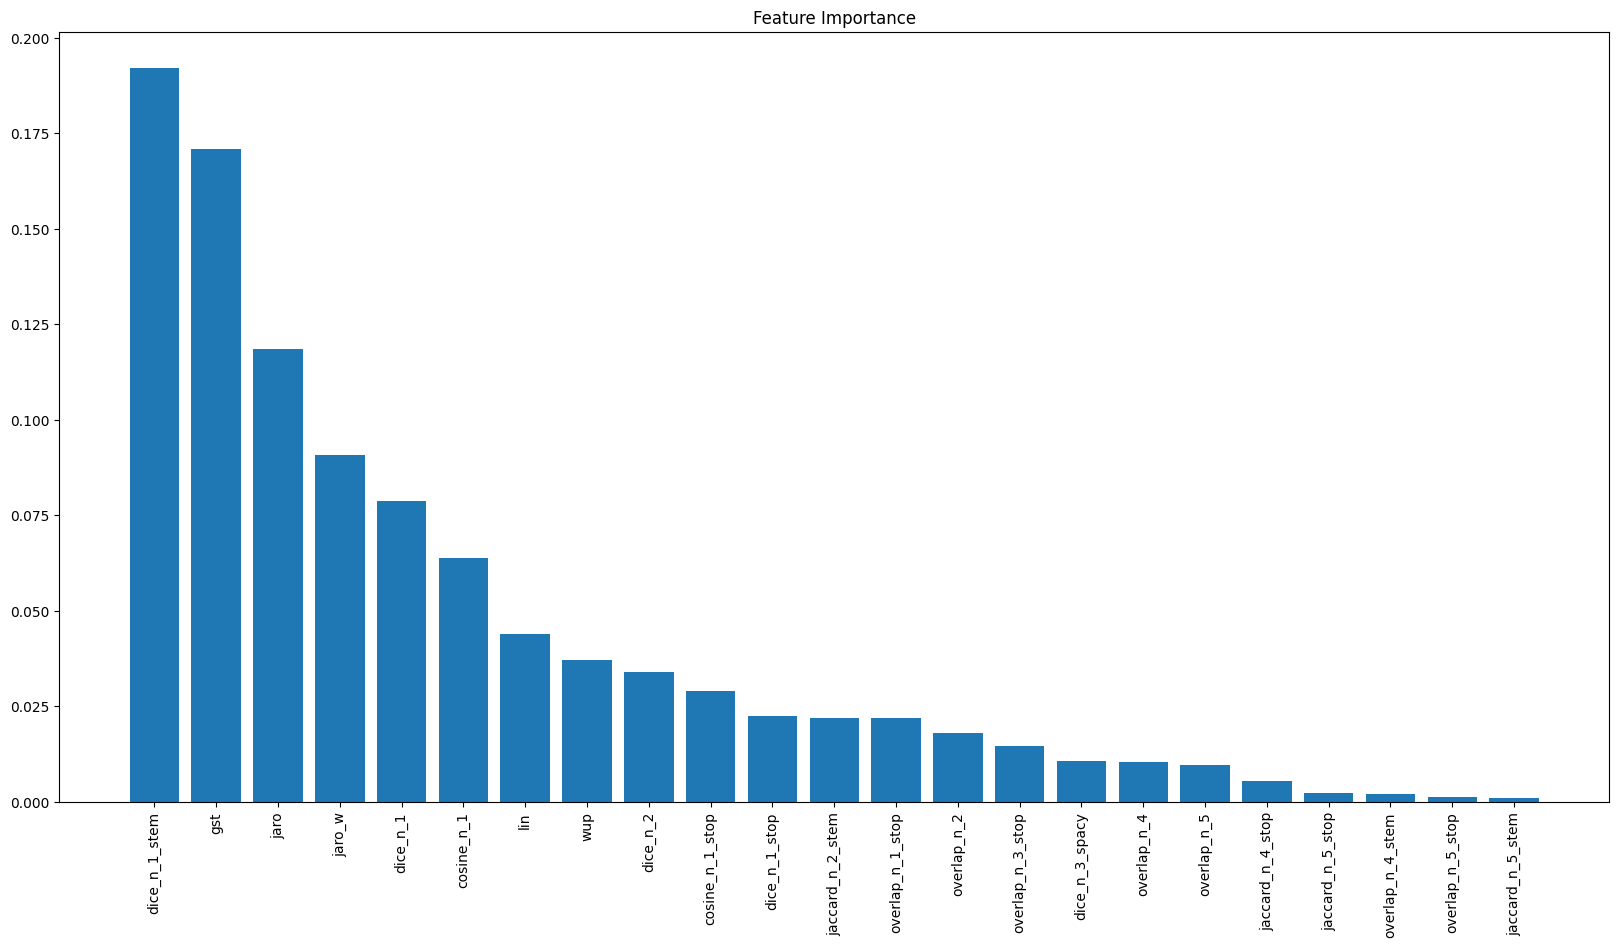

In [832]:
plot_feature_importances(rf_gscv_eur.best_estimator_['model'], X_train_eur)

# Definitive

# Total or Independent Model?

In [836]:
X_train_par.columns

Index(['lcstr', 'lcseq', 'jaro', 'jaro_w', 'dice_n_1', 'overlap_n_1',
       'cosine_n_1', 'overlap_n_3', 'overlap_n_4', 'dice_n_1_spacy',
       'overlap_n_1_spacy', 'cosine_n_1_spacy', 'jaccard_n_3_spacy',
       'dice_n_3_spacy', 'overlap_n_3_spacy', 'dice_n_5_spacy', 'wup',
       'dice_n_1_stop', 'dice_n_2_stop', 'jaccard_n_3_stop', 'dice_n_3_stop',
       'overlap_n_4_stop', 'dice_n_5_stop', 'dice_n_1_stem', 'cosine_n_1_stem',
       'jaccard_n_2_stem', 'dice_n_2_stem', 'cosine_n_2_stem', 'dice_n_4_stem',
       'dice_n_5_stem'],
      dtype='object')

In [839]:
df_train[X_train_par.columns]

,lcstr,lcseq,jaro,jaro_w,dice_n_1,overlap_n_1,cosine_n_1,overlap_n_3,overlap_n_4,dice_n_1_spacy,overlap_n_1_spacy,cosine_n_1_spacy,jaccard_n_3_spacy,dice_n_3_spacy,overlap_n_3_spacy,dice_n_5_spacy,wup,dice_n_1_stop,dice_n_2_stop,jaccard_n_3_stop,dice_n_3_stop,overlap_n_4_stop,dice_n_5_stop,dice_n_1_stem,cosine_n_1_stem,jaccard_n_2_stem,dice_n_2_stem,cosine_n_2_stem,dice_n_4_stem,dice_n_5_stem
0,75,105,0.865225,0.919135,0.708333,0.772727,0.710806,0.545455,0.523810,0.720000,0.900000,0.734847,0.500,0.666667,0.875000,0.588235,9.399643,0.666667,0.416667,0.222222,0.363636,0.3,0.222222,0.720000,0.734847,0.095238,0.173913,0.178174,0.000000,0.0
1,24,53,0.738972,0.843383,0.615385,0.727273,0.622799,0.111111,0.000000,0.615385,0.800000,0.632456,0.125,0.222222,0.333333,0.000000,5.526786,0.545455,0.000000,0.000000,0.000000,0.0,0.000000,0.615385,0.632456,0.100000,0.181818,0.188982,0.000000,0.0
2,27,56,0.782203,0.782203,0.533333,0.533333,0.533333,0.200000,0.142857,0.555556,0.625000,0.559017,0.000,0.000000,0.000000,0.000000,7.003509,0.444444,0.181818,0.000000,0.000000,0.0,0.000000,0.555556,0.559017,0.142857,0.250000,0.251976,0.000000,0.0
3,129,133,0.901976,0.941186,0.791667,0.950000,0.802897,0.894737,0.888889,0.785714,0.916667,0.793857,0.600,0.750000,0.900000,0.700000,12.586325,0.750000,0.714286,0.500000,0.666667,1.0,0.500000,0.785714,0.793857,0.444444,0.615385,0.622799,0.363636,0.3
4,20,54,0.696501,0.696501,0.400000,0.437500,0.401478,0.000000,0.000000,0.250000,0.272727,0.250873,0.000,0.000000,0.000000,0.000000,6.796520,0.500000,0.000000,0.000000,0.000000,0.0,0.000000,0.250000,0.250873,0.047619,0.090909,0.091287,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,25,57,0.724605,0.724605,0.647059,0.647059,0.647059,0.312500,0.200000,0.545455,0.750000,0.566947,0.000,0.000000,0.000000,0.000000,3.785714,0.700000,0.400000,0.125000,0.222222,0.0,0.000000,0.545455,0.566947,0.000000,0.000000,0.000000,0.000000,0.0
2230,14,56,0.690038,0.690038,0.585366,0.600000,0.585540,0.166667,0.058824,0.461538,0.500000,0.462910,0.000,0.000000,0.000000,0.000000,5.158730,0.583333,0.173913,0.000000,0.000000,0.0,0.000000,0.461538,0.462910,0.100000,0.181818,0.182574,0.000000,0.0
2231,40,40,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,1.000000,1.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
2232,48,129,0.770009,0.770009,0.723404,0.739130,0.723568,0.307692,0.200000,0.666667,0.666667,0.666667,0.100,0.181818,0.181818,0.000000,10.813374,0.777778,0.363636,0.045455,0.086957,0.0,0.000000,0.666667,0.666667,0.100000,0.181818,0.181818,0.000000,0.0


In [840]:
ls_files = ["MSRpar", "MSRvid", "SMTeuroparl"]
ls_models = [rf_gscv_par, rf_gscv_vid, rf_gscv_eur]
ls_cols = [X_train_par.columns, X_train_vid.columns, X_train_eur.columns]
orig_cols = X_train.columns

df_comp_train = pd.DataFrame()
for file, ind_model, cols in zip(ls_files, ls_models, ls_cols):
    print(file)
    X_train_file = df_train[df_train.file == file]
    y_train = X_train_file.gs
    y_total_model = rf_gscv.predict(X_train_file[orig_cols])
    y_ind_model = ind_model.predict(X_train_file[cols])

    df_comp_train.loc["IND", file] = pearsonr(y_ind_model, y_train).statistic
    df_comp_train.loc["COL", file] = pearsonr(y_total_model, y_train).statistic

df_comp_train


MSRpar
MSRvid
SMTeuroparl


,MSRpar,MSRvid,SMTeuroparl
IND,0.877220,0.970969,0.938359
COL,0.913688,0.946218,0.897520


In [842]:
ls_files = ["MSRpar", "MSRvid", "SMTeuroparl"]
ls_models = [rf_gscv_par, rf_gscv_vid, rf_gscv_eur]
ls_cols = [X_train_par.columns, X_train_vid.columns, X_train_eur.columns]
orig_cols = X_train.columns

df_comp_test = pd.DataFrame()
for file, ind_model, cols in zip(ls_files, ls_models, ls_cols):
    print(file)
    X_test_file = df_test[df_test.file == file]
    y_test = X_test_file.gs
    y_total_model = rf_gscv.predict(X_test_file[orig_cols])
    y_ind_model = ind_model.predict(X_test_file[cols])

    df_comp_test.loc["IND", file] = pearsonr(y_ind_model, y_test).statistic
    df_comp_test.loc["COL", file] = pearsonr(y_total_model, y_test).statistic

df_comp_test


MSRpar
MSRvid
SMTeuroparl


,MSRpar,MSRvid,SMTeuroparl
IND,0.658014,0.841909,0.439693
COL,0.625792,0.836727,0.530180


In [845]:
y_out_total = np.concatenate([y_test_par, y_test_vid, y_test_eur, y_onwn, y_smt])
y_pred_total = np.concatenate([y_pred_par, y_pred_vid, y_pred_eur, y_pred_onwn, y_pred_smt])

y_out_total.shape, y_pred_total.shape

((3108,), (3108,))

In [848]:
pearsonr(y_test_eur, y_pred_eur)

PearsonRResult(statistic=0.4396925509399411, pvalue=4.025353509777356e-23)

In [847]:
pearsonr(y_out_total, y_pred_total)

PearsonRResult(statistic=0.7736367262782937, pvalue=0.0)

In [594]:
np.corrcoef(y_out_total, np.round(y_pred_total, 2))

array([[1.        , 0.76474621],
       [0.76474621, 1.        ]])

In [584]:
y_test_par

0      4.40
1      0.80
2      3.60
3      3.40
4      1.40
       ... 
745    2.60
746    3.20
747    4.40
748    1.25
749    2.50
Name: gs, Length: 750, dtype: float64